### RANDOM WALK: Metropolis Algorithm

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels as sm
import empiricaldist as emd
import scipy.stats as st

import random as rand

import utils as ut

import warnings

warnings.filterwarnings('ignore')

In [2]:
islands = [num for num in range(1, 8)]
pops = [pop for pop in range(10, 71, 10)]

print(islands, pops)

[1, 2, 3, 4, 5, 6, 7] [10, 20, 30, 40, 50, 60, 70]


In [3]:
island_dict = {}

for idx, item in enumerate(pops):
    island_dict[idx+1] = item

In [4]:
island_dict

{1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60, 7: 70}

In [5]:
initial_island = 4

right_left = ['R', 'L']

In [6]:
def walk(starting_island, loop):

    stayed_islands = []
    curr_island = starting_island

    for iter in range(0, loop):
        curr_island_pop = island_dict[curr_island]
        step = rand.choice(right_left)

        if step == 'R':

            next_island = curr_island+1

            if next_island == 8:
                pass
            else:
                next_island_pop = island_dict[curr_island+1]

                move_to = next_island
                curr_island = move_to

        elif step == 'L':

            next_island = curr_island-1

            if next_island == 0:
                pass
            else:
                next_island_pop = island_dict[curr_island-1]

                prop = next_island_pop / curr_island_pop
                value = rand.random()

                if value > prop:
                    move_to = curr_island
                    curr_island = move_to
                
                else:
                    move_to = next_island
                    curr_island = move_to
        
        stayed_islands.append(curr_island)
    return stayed_islands

In [7]:
walks = walk(4, 10001)
walks[:5]

[5, 4, 3, 4, 3]

In [8]:
df = pd.DataFrame(pd.Series(walks).value_counts().values.tolist(), pd.Series(walks).value_counts().index.tolist())\
.reset_index()\
.rename(columns={'index':'Islands',0:'Days'})

df

,Islands,Days
0,7,2335
1,6,2068
2,5,1834
3,4,1526
4,3,1139
5,2,733
6,1,366


Text(0, 0.5, 'Days Spent')

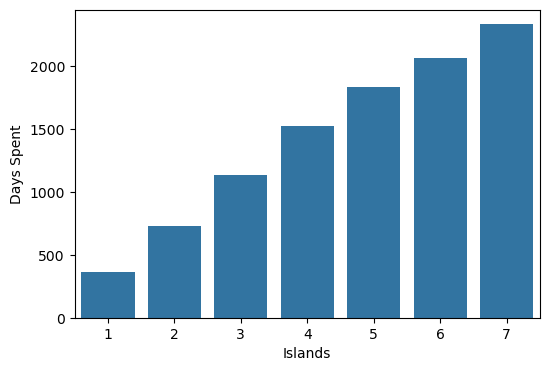

In [9]:
plt.figure(figsize=(6, 4))

sns.barplot(x=df['Islands'], y=df['Days'])
plt.ylabel('Days Spent')

In [10]:
islands_hist = emd.Hist.from_seq(walks)

In [11]:
islands_pmf = emd.Pmf.from_seq(walks)

Text(0.5, 1.0, 'Relative Time Spent on Each Island')

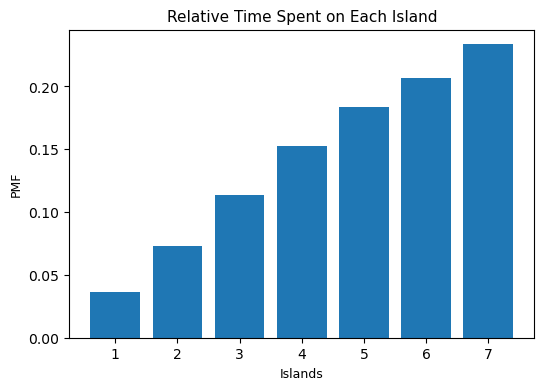

In [12]:
plt.figure(figsize=(6,4))

plt.bar(islands_pmf.qs, islands_pmf.ps)

plt.xlabel('Islands', fontsize=9)
plt.ylabel('PMF', fontsize=9)
plt.title('Relative Time Spent on Each Island', fontsize=11)